In [31]:
# Autoprint
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [33]:
pd.reset_option('all')
pd.set_option('display.max_columns', None)

In [34]:
# Read in Spotrac salary data
salary_2022_23_data = pd.read_csv("data/NBA_2023_Free_Agents.csv")
salary_2022_23_data['Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr'] = 135021000
salary_2022_23_data['AAV'] = salary_2022_23_data['AVG. SALARY']
del salary_2022_23_data['AVG. SALARY']
salary_2022_23_data.AAV = salary_2022_23_data.AAV.str.replace('$','',regex=False)
salary_2022_23_data.AAV = salary_2022_23_data.AAV.str.replace(',','',regex=False)

salary_2022_23_data['AAV'] = salary_2022_23_data['AAV'].astype(int)
salary_2022_23_data['Salary_Cap_Pct_Twenty_Four'] = (salary_2022_23_data['AAV']\
/ salary_2022_23_data['Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr']) * 100
salary_2022_23_data.dtypes
salary_2022_23_data = salary_2022_23_data.rename(columns={'PLAYER':'Player'})
salary_2022_23_data

salary_2023_24_data = pd.read_csv("data/NBA_2024_Free_Agents.csv")
salary_2023_24_data['Year'] = 2024
salary_2023_24_data['Salary_Cap_Twenty_Four_to_Twenty_Five_Lg_Yr_Projected'] = 141000000
salary_2023_24_data['Salary_Twenty_Four'] = salary_2023_24_data['2023-24 AAV']
del salary_2023_24_data['2023-24 AAV']
salary_2023_24_data.Salary_Twenty_Four = salary_2023_24_data.Salary_Twenty_Four.str.replace('$','',regex=False)
salary_2023_24_data.Salary_Twenty_Four = salary_2023_24_data.Salary_Twenty_Four.str.replace(',','',regex=False)
salary_2023_24_data = salary_2023_24_data.drop(salary_2023_24_data[salary_2023_24_data['Salary_Twenty_Four'] == '-'].index)
salary_2023_24_data['Salary_Twenty_Four'] = salary_2023_24_data['Salary_Twenty_Four'].astype(int)
salary_2022_23_data.dtypes
salary_2023_24_data = salary_2023_24_data.rename(columns={'PLAYER':'Player'})
salary_2023_24_data

PLAYER                                           object
POS.                                             object
AGE                                             float64
TYPE                                             object
FROM                                             object
TO                                               object
YRS                                               int64
VALUE                                            object
MAX VALUE                                        object
Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr      int64
AAV                                               int32
Salary_Cap_Pct_Twenty_Four                      float64
dtype: object

,Player,POS.,AGE,TYPE,FROM,TO,YRS,VALUE,MAX VALUE,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,AAV,Salary_Cap_Pct_Twenty_Four
0,Jerami Grant,PF,29.2,UFA,POR,POR,5,"$160,000,000","$160,000,000",135021000,32000000,23.700017
1,Fred VanVleet,PG,29.3,UFA,TOR,HOU,3,"$128,539,845","$128,539,845",135021000,42846615,31.733297
2,Kyrie Irving,PG,31.2,UFA,DAL,DAL,3,"$120,000,000","$126,000,000",135021000,40000000,29.625021
3,Draymond Green,PF,33.3,UFA,GSW,GSW,4,"$100,000,000","$100,000,000",135021000,25000000,18.515638
4,Khris Middleton,SF,31.8,UFA,MIL,MIL,3,"$93,000,000","$102,185,185",135021000,31000000,22.959392
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Mamadi Diakite,PF,26.7,UFA,CLE,NYK,1,"$2,092,354","$2,092,354",135021000,2092354,1.549651
95,Sandro Mamukelashvili,C,24.2,UFA,SAS,SAS,1,"$2,019,706","$2,019,706",135021000,2019706,1.495846
96,Trendon Watford,PF,22.7,UFA,POR,BKN,1,"$2,019,706","$2,019,706",135021000,2019706,1.495846
97,Mac McClung,PG,24.7,UFA,PHI,ORL,1,"$2,019,706","$2,019,706",135021000,2019706,1.495846


Player                                           object
POS.                                             object
AGE                                             float64
TYPE                                             object
FROM                                             object
TO                                               object
YRS                                               int64
VALUE                                            object
MAX VALUE                                        object
Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr      int64
AAV                                               int32
Salary_Cap_Pct_Twenty_Four                      float64
dtype: object

,Player,POS.,AGE,EXP,TEAM,Year,Salary_Cap_Twenty_Four_to_Twenty_Five_Lg_Yr_Projected,Salary_Twenty_Four
0,Klay Thompson,SG,34.0,13,GSW,2024,141000000,37980720
1,Tobias Harris,PF,31.6,13,PHI,2024,141000000,36000000
2,James Harden,SG,34.5,14,LAC,2024,141000000,34320000
3,Pascal Siakam,PF,29.9,8,IND,2024,141000000,34226304
4,Gordon Hayward,SF,33.9,14,OKC,2024,141000000,30000000
...,...,...,...,...,...,...,...,...
78,Bismack Biyombo,C,31.5,13,OKC,2024,141000000,1194075
79,Thaddeus Young,PF,35.7,17,PHX,2024,141000000,1010371
80,Delon Wright,PG,31.8,9,MIA,2024,141000000,947205
81,Aleksej Pokusevski,PF,22.2,4,CHA,2024,141000000,565176


In [35]:
# Read in bballref per 100 data
per100_2022_23_data = pd.read_csv("data/p100NBA2023totals.csv")
per100_2022_23_data['Year'] = 2023
per100_2022_23_data['PRA'] = per100_2022_23_data.PTS + per100_2022_23_data.TRB + per100_2022_23_data.AST
per100_2022_23_data['NRtg'] = per100_2022_23_data.ORtg - per100_2022_23_data.DRtg
per100_2022_23_data

per100_2021_22_data = pd.read_csv("data/p100NBA2022totals.csv")
per100_2021_22_data['Year'] = 2022
per100_2021_22_data['PRA'] = per100_2021_22_data.PTS + per100_2021_22_data.TRB + per100_2021_22_data.AST
per100_2021_22_data['NRtg'] = per100_2021_22_data.ORtg - per100_2021_22_data.DRtg
per100_2021_22_data

per100 = pd.merge(per100_2022_23_data, per100_2021_22_data, on='Player', how='inner',\
                  suffixes=['_Twenty_Three_per_hundred', '_Twenty_Two_per_hundred'])
per100

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg,Player-additional,Year,PRA,NRtg
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,8.5,17.5,0.485,1.3,4.7,0.269,7.2,12.8,0.564,3.8,5.4,0.702,4.3,9.9,14.2,2.2,1.3,1.3,2.6,4.4,22.0,NaN,112.0,113,achiupr01,2023,38.4,-1.0
1,2,Steven Adams,C,29,MEM,42,42,1133,6.6,11.0,0.597,0.0,0.0,0.000,6.6,11.0,0.599,2.0,5.4,0.364,9.0,11.4,20.3,4.1,1.5,1.9,3.3,4.1,15.1,NaN,118.0,108,adamsst01,2023,39.5,10.0
2,3,Bam Adebayo,C,25,MIA,75,75,2598,11.6,21.4,0.540,0.0,0.2,0.083,11.5,21.2,0.545,6.2,7.7,0.806,3.5,9.7,13.2,4.6,1.7,1.2,3.6,4.0,29.3,NaN,115.0,111,adebaba01,2023,47.1,4.0
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,6.5,15.3,0.427,3.2,9.0,0.355,3.3,6.2,0.532,2.2,2.7,0.812,1.7,3.1,4.8,2.6,0.6,0.6,1.6,3.9,18.5,NaN,115.0,121,agbajoc01,2023,25.9,-6.0
4,5,Santi Aldama,PF,22,MEM,77,20,1682,7.0,14.8,0.470,2.7,7.5,0.353,4.3,7.3,0.591,3.0,4.1,0.750,2.4,8.1,10.5,2.7,1.3,1.4,1.7,4.0,19.7,NaN,120.0,111,aldamsa01,2023,32.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,Thaddeus Young,PF,34,TOR,54,9,795,6.7,12.3,0.545,0.4,2.1,0.176,6.3,10.2,0.622,1.1,1.6,0.692,4.4,5.9,10.3,4.7,3.4,0.3,2.6,5.5,14.9,NaN,117.0,112,youngth01,2023,29.9,5.0
535,536,Trae Young,PG,24,ATL,73,73,2541,11.2,26.1,0.429,2.9,8.6,0.335,8.3,17.4,0.476,10.6,12.0,0.886,1.1,3.0,4.1,13.9,1.5,0.2,5.6,2.0,35.9,NaN,116.0,119,youngtr01,2023,53.9,-3.0
536,537,Omer Yurtseven,C,24,MIA,9,0,83,9.6,16.2,0.593,1.8,4.2,0.429,7.8,12.0,0.650,3.0,3.6,0.833,4.8,9.0,13.8,1.2,1.2,1.2,2.4,9.6,24.0,NaN,126.0,112,yurtsom01,2023,39.0,14.0
537,538,Cody Zeller,C,30,MIA,15,2,217,8.5,13.6,0.627,0.0,0.5,0.000,8.5,13.1,0.649,5.5,8.0,0.686,5.7,9.0,14.7,2.3,0.7,0.9,3.2,7.6,22.5,NaN,124.0,114,zelleco01,2023,39.5,10.0


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg,Player-additional,Year,PRA,NRtg
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,7.7,17.5,0.439,1.6,4.5,0.359,6.1,13.0,0.468,2.3,3.8,0.595,4.2,9.5,13.7,2.4,1.1,1.2,2.4,4.4,19.2,NaN,105.0,110,achiupr01,2022,35.3,-5.0
1,2,Steven Adams,C,28,MEM,76,75,1999,5.0,9.2,0.547,0.0,0.0,0.000,5.0,9.2,0.548,2.6,4.8,0.543,8.4,9.8,18.2,6.1,1.6,1.4,2.8,3.7,12.6,NaN,125.0,108,adamsst01,2022,36.9,17.0
2,3,Bam Adebayo,C,24,MIA,56,56,1825,11.1,20.0,0.557,0.0,0.2,0.000,11.1,19.8,0.562,7.0,9.3,0.753,3.8,11.7,15.5,5.2,2.2,1.2,4.1,4.7,29.3,NaN,117.0,104,adebaba01,2022,50.0,13.0
3,4,Santi Aldama,PF,21,MEM,32,0,360,7.0,17.5,0.402,0.8,6.4,0.125,6.2,11.2,0.560,2.7,4.3,0.625,4.4,7.2,11.6,2.8,0.8,1.3,2.1,4.8,17.5,NaN,101.0,111,aldamsa01,2022,31.9,-10.0
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,11.6,21.1,0.550,0.6,2.1,0.304,11.0,19.0,0.578,4.1,4.7,0.873,3.4,8.5,11.9,1.9,0.6,2.2,2.0,3.6,28.0,NaN,119.0,112,aldrila01,2022,41.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young,PF,33,TOT,52,1,845,8.2,15.8,0.518,1.0,2.8,0.354,7.2,13.0,0.554,1.3,2.8,0.469,4.6,7.4,12.1,6.0,3.1,1.0,3.0,4.7,18.7,NaN,113.0,108,youngth01,2022,36.8,5.0
601,602,Trae Young,PG,23,ATL,76,76,2652,13.2,28.6,0.460,4.3,11.3,0.382,8.9,17.3,0.512,9.3,10.2,0.904,0.9,4.3,5.3,13.7,1.3,0.1,5.6,2.4,39.9,NaN,119.0,118,youngtr01,2022,58.9,1.0
602,603,Omer Yurtseven,C,23,MIA,56,12,706,9.2,17.5,0.526,0.1,0.8,0.091,9.1,16.7,0.547,2.7,4.3,0.623,6.0,14.8,20.8,3.5,1.2,1.4,2.9,6.0,21.2,NaN,112.0,104,yurtsom01,2022,45.5,8.0
603,604,Cody Zeller,C,29,POR,27,0,355,7.0,12.4,0.567,0.0,0.6,0.000,7.0,11.8,0.593,5.2,6.7,0.776,6.9,10.3,17.2,3.0,1.1,0.8,2.6,7.7,19.3,NaN,127.0,116,zelleco01,2022,39.5,11.0


,Rk_Twenty_Three_per_hundred,Player,Pos_Twenty_Three_per_hundred,Age_Twenty_Three_per_hundred,Tm_Twenty_Three_per_hundred,G_Twenty_Three_per_hundred,GS_Twenty_Three_per_hundred,MP_Twenty_Three_per_hundred,FG_Twenty_Three_per_hundred,FGA_Twenty_Three_per_hundred,FG%_Twenty_Three_per_hundred,3P_Twenty_Three_per_hundred,3PA_Twenty_Three_per_hundred,3P%_Twenty_Three_per_hundred,2P_Twenty_Three_per_hundred,2PA_Twenty_Three_per_hundred,2P%_Twenty_Three_per_hundred,FT_Twenty_Three_per_hundred,FTA_Twenty_Three_per_hundred,FT%_Twenty_Three_per_hundred,ORB_Twenty_Three_per_hundred,DRB_Twenty_Three_per_hundred,TRB_Twenty_Three_per_hundred,AST_Twenty_Three_per_hundred,STL_Twenty_Three_per_hundred,BLK_Twenty_Three_per_hundred,TOV_Twenty_Three_per_hundred,PF_Twenty_Three_per_hundred,PTS_Twenty_Three_per_hundred,Unnamed: 29_Twenty_Three_per_hundred,ORtg_Twenty_Three_per_hundred,DRtg_Twenty_Three_per_hundred,Player-additional_Twenty_Three_per_hundred,Year_Twenty_Three_per_hundred,PRA_Twenty_Three_per_hundred,NRtg_Twenty_Three_per_hundred,Rk_Twenty_Two_per_hundred,Pos_Twenty_Two_per_hundred,Age_Twenty_Two_per_hundred,Tm_Twenty_Two_per_hundred,G_Twenty_Two_per_hundred,GS_Twenty_Two_per_hundred,MP_Twenty_Two_per_hundred,FG_Twenty_Two_per_hundred,FGA_Twenty_Two_per_hundred,FG%_Twenty_Two_per_hundred,3P_Twenty_Two_per_hundred,3PA_Twenty_Two_per_hundred,3P%_Twenty_Two_per_hundred,2P_Twenty_Two_per_hundred,2PA_Twenty_Two_per_hundred,2P%_Twenty_Two_per_hundred,FT_Twenty_Two_per_hundred,FTA_Twenty_Two_per_hundred,FT%_Twenty_Two_per_hundred,ORB_Twenty_Two_per_hundred,DRB_Twenty_Two_per_hundred,TRB_Twenty_Two_per_hundred,AST_Twenty_Two_per_hundred,STL_Twenty_Two_per_hundred,BLK_Twenty_Two_per_hundred,TOV_Twenty_Two_per_hundred,PF_Twenty_Two_per_hundred,PTS_Twenty_Two_per_hundred,Unnamed: 29_Twenty_Two_per_hundred,ORtg_Twenty_Two_per_hundred,DRtg_Twenty_Two_per_hundred,Player-additional_Twenty_Two_per_hundred,Year_Twenty_Two_per_hundred,PRA_Twenty_Two_per_hundred,NRtg_Twenty_Two_per_hundred
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,8.5,17.5,0.485,1.3,4.7,0.269,7.2,12.8,0.564,3.8,5.4,0.702,4.3,9.9,14.2,2.2,1.3,1.3,2.6,4.4,22.0,NaN,112.0,113,achiupr01,2023,38.4,-1.0,1,C,22,TOR,73,28,1725,7.7,17.5,0.439,1.6,4.5,0.359,6.1,13.0,0.468,2.3,3.8,0.595,4.2,9.5,13.7,2.4,1.1,1.2,2.4,4.4,19.2,NaN,105.0,110,achiupr01,2022,35.3,-5.0
1,2,Steven Adams,C,29,MEM,42,42,1133,6.6,11.0,0.597,0.0,0.0,0.000,6.6,11.0,0.599,2.0,5.4,0.364,9.0,11.4,20.3,4.1,1.5,1.9,3.3,4.1,15.1,NaN,118.0,108,adamsst01,2023,39.5,10.0,2,C,28,MEM,76,75,1999,5.0,9.2,0.547,0.0,0.0,0.000,5.0,9.2,0.548,2.6,4.8,0.543,8.4,9.8,18.2,6.1,1.6,1.4,2.8,3.7,12.6,NaN,125.0,108,adamsst01,2022,36.9,17.0
2,3,Bam Adebayo,C,25,MIA,75,75,2598,11.6,21.4,0.540,0.0,0.2,0.083,11.5,21.2,0.545,6.2,7.7,0.806,3.5,9.7,13.2,4.6,1.7,1.2,3.6,4.0,29.3,NaN,115.0,111,adebaba01,2023,47.1,4.0,3,C,24,MIA,56,56,1825,11.1,20.0,0.557,0.0,0.2,0.000,11.1,19.8,0.562,7.0,9.3,0.753,3.8,11.7,15.5,5.2,2.2,1.2,4.1,4.7,29.3,NaN,117.0,104,adebaba01,2022,50.0,13.0
3,5,Santi Aldama,PF,22,MEM,77,20,1682,7.0,14.8,0.470,2.7,7.5,0.353,4.3,7.3,0.591,3.0,4.1,0.750,2.4,8.1,10.5,2.7,1.3,1.4,1.7,4.0,19.7,NaN,120.0,111,aldamsa01,2023,32.9,9.0,4,PF,21,MEM,32,0,360,7.0,17.5,0.402,0.8,6.4,0.125,6.2,11.2,0.560,2.7,4.3,0.625,4.4,7.2,11.6,2.8,0.8,1.3,2.1,4.8,17.5,NaN,101.0,111,aldamsa01,2022,31.9,-10.0
4,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,884,7.1,15.9,0.444,3.3,8.6,0.384,3.8,7.3,0.515,2.2,3.2,0.667,0.8,4.6,5.4,5.8,1.7,1.1,3.0,4.7,19.6,NaN,109.0,116,alexani01,2023,30.8,-7.0,6,SG,23,TOT,65,21,1466,8.5,22.9,0.372,3.5,11.4,0.311,5.0,11.5,0.433,2.7,3.7,0.743,1.2,5.1,6.3,5.3,1.5,0.8,3.1,3.5,23.3,NaN,98.0,114,alexani01,2022,34.9,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,535,Thaddeus Young,PF,34,TOR,54,9,795,6.7,12.3,0.5

In [36]:
# Read in bball index LEBRON data
LEBRON_2022_23_data = pd.read_csv("data/NBA_2022_2023_LEBRON.csv")
LEBRON_2022_23_data['Year'] = 2023
LEBRON_2022_23_data

LEBRON_2021_22_data = pd.read_csv("data/NBA_2021_2022_LEBRON.csv")
LEBRON_2021_22_data['Year'] = 2022
LEBRON_2021_22_data

LEBRON = pd.merge(LEBRON_2022_23_data, LEBRON_2021_22_data, on='PLAYER', how='inner',\
                  suffixes=['_Twenty_Three_LEBRON', '_Twenty_Two_LEBRON'])
LEBRON
LEBRON = LEBRON.rename(columns={'PLAYER':'Player'})

,PLAYER,SEASON,TEAM,OFFENSIVE ARCHETYPE,MINUTES,POS,AGE,LEBRON,O-LEBRON,D-LEBRON,WAR,LEBRON CONTRACT VALUE,BOXLEBRON,BOXOLEBRON,BOXDLEBRON,Year
0,Nikola Jokic,2022-23,DEN,Post Scorer,"2,323",C,28,7.31,5.55,1.76,13.8,"43,920,291.00",5.68,4.50,1.17,2023
1,Giannis Antetokounmpo,2022-23,MIL,Shot Creator,"2,024",PF,28,5.87,4.73,1.14,10.4,"33,185,325.00",5.33,4.11,1.22,2023
2,Joel Embiid,2022-23,PHI,Shot Creator,"2,284",C,29,5.86,3.78,2.08,11.7,"37,414,842.00",5.83,4.61,1.22,2023
3,Jimmy Butler,2022-23,MIA,Shot Creator,"2,138",SF,33,5.01,4.27,0.74,9.9,"31,693,331.00",4.32,3.59,0.73,2023
4,Anthony Davis,2022-23,LAL,Shot Creator,"1,905",C,30,4.90,2.21,2.69,8.7,"27,840,660.00",4.16,2.38,1.77,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Jaden Ivey,2022-23,DET,Primary Ball Handler,"2,304",SG,21,-3.72,-1.69,-2.03,-1.8,"-5,823,127.00",-2.46,-0.79,-1.67,2023
535,JT Thor,2022-23,CHO,Athletic Finisher,969,PF,20,-3.72,-3.40,-0.32,-0.8,"-2,452,117.00",-3.21,-3.08,-0.12,2023
536,Justin Holiday,2022-23,ATL/DAL,Movement Shooter,706,SG,34,-3.72,-2.65,-1.07,-0.6,"-1,787,899.00",-2.02,-1.64,-0.38,2023
537,Robin Lopez,2022-23,CLE,Post Scorer,299,C,35,-4.17,-3.14,-1.03,-0.3,"-1,013,626.00",-3.10,-2.37,-0.73,2023


,PLAYER,SEASON,TEAM,OFFENSIVE ARCHETYPE,MINUTES,POS,AGE,LEBRON,O-LEBRON,D-LEBRON,WAR,LEBRON CONTRACT VALUE,BOXLEBRON,BOXOLEBRON,BOXDLEBRON,Year
0,Nikola Jokic,2021-22,DEN,Post Scorer,"2,476",C,27,7.80,5.68,2.12,15.5,"45,075,896.00",6.53,5.11,1.42,2022
1,Giannis Antetokounmpo,2021-22,MIL,Roll + Cut Big,"2,204",PF,27,6.54,4.37,2.17,12.3,"35,774,351.00",6.58,4.97,1.61,2022
2,Joel Embiid,2021-22,PHI,Post Scorer,"2,297",C,28,6.39,4.29,2.09,12.7,"36,726,497.00",5.63,4.36,1.27,2022
3,Rudy Gobert,2021-22,UTA,Roll + Cut Big,"2,120",C,29,5.32,1.57,3.75,10.4,"30,141,735.00",5.04,1.72,3.32,2022
4,Jayson Tatum,2021-22,BOS,Shot Creator,"2,731",SF,24,5.11,3.85,1.26,13.0,"37,823,038.00",3.97,3.22,0.75,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Avery Bradley,2021-22,LAL,Stationary Shooter,"1,406",SG,31,-4.00,-3.55,-0.44,-1.4,"-4,153,859.00",-2.55,-2.14,-0.41,2022
601,R.J. Hampton,2021-22,ORL,Secondary Ball Handler,"1,402",SG,21,-4.17,-3.36,-0.81,-1.6,"-4,569,478.00",-2.75,-2.40,-0.35,2022
602,Tre Mann,2021-22,OKC,Secondary Ball Handler,"1,367",PG,21,-4.20,-2.26,-1.94,-1.6,"-4,523,793.00",-2.75,-1.93,-0.82,2022
603,Keljin Blevins,2021-22,POR,Movement Shooter,349,SF,26,-4.41,-2.19,-2.22,-0.4,"-1,286,674.00",-2.87,-1.61,-1.27,2022


,PLAYER,SEASON_Twenty_Three_LEBRON,TEAM_Twenty_Three_LEBRON,OFFENSIVE ARCHETYPE_Twenty_Three_LEBRON,MINUTES_Twenty_Three_LEBRON,POS_Twenty_Three_LEBRON,AGE_Twenty_Three_LEBRON,LEBRON_Twenty_Three_LEBRON,O-LEBRON_Twenty_Three_LEBRON,D-LEBRON_Twenty_Three_LEBRON,WAR_Twenty_Three_LEBRON,LEBRON CONTRACT VALUE_Twenty_Three_LEBRON,BOXLEBRON_Twenty_Three_LEBRON,BOXOLEBRON_Twenty_Three_LEBRON,BOXDLEBRON_Twenty_Three_LEBRON,Year_Twenty_Three_LEBRON,SEASON_Twenty_Two_LEBRON,TEAM_Twenty_Two_LEBRON,OFFENSIVE ARCHETYPE_Twenty_Two_LEBRON,MINUTES_Twenty_Two_LEBRON,POS_Twenty_Two_LEBRON,AGE_Twenty_Two_LEBRON,LEBRON_Twenty_Two_LEBRON,O-LEBRON_Twenty_Two_LEBRON,D-LEBRON_Twenty_Two_LEBRON,WAR_Twenty_Two_LEBRON,LEBRON CONTRACT VALUE_Twenty_Two_LEBRON,BOXLEBRON_Twenty_Two_LEBRON,BOXOLEBRON_Twenty_Two_LEBRON,BOXDLEBRON_Twenty_Two_LEBRON,Year_Twenty_Two_LEBRON
0,Nikola Jokic,2022-23,DEN,Post Scorer,"2,323",C,28,7.31,5.55,1.76,13.8,"43,920,291.00",5.68,4.50,1.17,2023,2021-22,DEN,Post Scorer,"2,476",C,27,7.80,5.68,2.12,15.5,"45,075,896.00",6.53,5.11,1.42,2022
1,Giannis Antetokounmpo,2022-23,MIL,Shot Creator,"2,024",PF,28,5.87,4.73,1.14,10.4,"33,185,325.00",5.33,4.11,1.22,2023,2021-22,MIL,Roll + Cut Big,"2,204",PF,27,6.54,4.37,2.17,12.3,"35,774,351.00",6.58,4.97,1.61,2022
2,Joel Embiid,2022-23,PHI,Shot Creator,"2,284",C,29,5.86,3.78,2.08,11.7,"37,414,842.00",5.83,4.61,1.22,2023,2021-22,PHI,Post Scorer,"2,297",C,28,6.39,4.29,2.09,12.7,"36,726,497.00",5.63,4.36,1.27,2022
3,Jimmy Butler,2022-23,MIA,Shot Creator,"2,138",SF,33,5.01,4.27,0.74,9.9,"31,693,331.00",4.32,3.59,0.73,2023,2021-22,MIA,Slasher,"1,931",SF,32,3.40,3.10,0.30,7.2,"20,917,896.00",3.92,2.98,0.94,2022
4,Anthony Davis,2022-23,LAL,Shot Creator,"1,905",C,30,4.90,2.21,2.69,8.7,"27,840,660.00",4.16,2.38,1.77,2023,2021-22,LAL,Post Scorer,"1,404",C,29,2.60,0.71,1.89,4.5,"13,159,475.00",2.72,1.46,1.26,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Austin Rivers,2022-23,MIN,Stationary Shooter,"1,016",SG,30,-3.27,-2.09,-1.18,-0.5,"-1,686,091.00",-2.61,-2.09,-0.53,2023,2021-22,DEN,Stationary Shooter,"1,480",SG,29,-2.56,-1.03,-1.53,-0.2,"-512,581.00",-2.20,-1.72,-0.49,2022
426,Doug McDermott,2022-23,SAS,Movement Shooter,"1,314",SF,31,-3.37,-0.63,-2.74,-0.8,"-2,428,976.00",-3.34,-1.16,-2.18,2023,2021-22,SAS,Movement Shooter,"1,223",PF,30,-2.30,-0.43,-1.87,0.1,"162,366.00",-1.99,-0.72,-1.27,2022
427,JT Thor,2022-23,CHO,Athletic Finisher,969,PF,20,-3.72,-3.40,-0.32,-0.8,"-2,452,117.00",-3.21,-3.08,-0.12,2023,2021-22,CHO,Athletic Finisher,262,PF,19,-2.12,-1.63,-0.49,0.0,"123,056.00",-1.53,-1.72,0.20,2022
428,Justin Holiday,2022-23,ATL/DAL,Movement Shooter,706,SG,34,-3.72,-2.65,-1.07,-0.6,"-1,787,899.00",-2.02,-1.64,-0.38,2023,2021-22,IND/SAC,Movement Shooter,"2,057",SF-SG,33,-1.08,-0.94,-0.14,1.7,"4,982,104.00",-1.37,-0.60,-0.77,2022


In [37]:
# Read in Usage data
usg_2022_23_data = pd.read_csv("data/USG23.csv")
usg_2022_23_data['Year'] = 2023
usg_2022_23_data['USGpct'] = usg_2022_23_data['USG%']
usg_2022_23_data

usg_2021_22_data = pd.read_csv("data/USG22.csv")
usg_2021_22_data['Year'] = 2022
usg_2021_22_data['USGpct'] = usg_2021_22_data['USG%']
usg_2021_22_data

usg = pd.merge(usg_2022_23_data, usg_2021_22_data, on='PLAYER', how='inner',\
               suffixes=['_Twenty_Three_usg', '_Twenty_Two_usg'])
usg
usg = usg.rename(columns={'PLAYER':'Player'})

usg.columns = usg.columns.str.replace('%', 'pct')
usg

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,Year,USGpct
0,1,Stanley Umude,DET,24,1,0,1,2,50.0,0.0,33.3,0.0,50.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,50.0,28.6,2023,50.0
1,2,Donovan Williams,ATL,21,2,1,1,4,38.5,33.3,50.0,0.0,66.7,0.0,0.0,0.0,40.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.3,2023,38.5
2,3,Giannis Antetokounmpo,MIL,28,63,47,16,2024,37.3,38.2,33.8,7.9,10.5,61.9,67.7,29.0,37.7,35.7,32.3,41.6,18.7,25.1,51.6,24.5,62.0,38.4,2023,37.3
3,4,Joel Embiid,PHI,29,66,43,23,2284,37.0,38.2,34.9,11.2,13.5,58.9,58.7,32.7,35.7,35.2,22.1,35.7,19.2,52.1,44.6,23.2,52.4,39.5,2023,37.0
4,5,Luka Doncic,DAL,24,66,33,33,2390,36.8,35.7,35.1,24.6,27.0,52.9,53.1,15.0,34.2,30.4,48.3,40.1,28.3,19.3,28.6,16.6,44.4,37.2,2023,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,Jericho Sims,NYK,24,52,31,21,812,7.4,12.7,7.4,0.0,0.2,4.3,4.5,51.8,25.7,32.4,7.4,11.6,16.9,52.8,8.1,28.6,9.9,10.0,2023,7.4
535,536,P.J. Tucker,PHI,38,75,48,27,1920,6.6,6.0,6.9,10.7,10.9,2.3,2.3,31.0,15.7,18.7,6.1,8.7,14.0,9.3,5.0,25.4,7.6,5.9,2023,6.6
536,537,Sterling Brown,LAL,28,4,2,2,24,6.1,0.0,7.4,0.0,10.5,0.0,0.0,42.9,22.7,27.6,20.0,0.0,50.0,0.0,25.0,33.3,0.0,0.0,2023,6.1
537,538,Jacob Gilyard,MEM,24,1,0,1,41,5.2,2.9,3.8,14.3,9.4,0.0,0.0,0.0,14.8,11.1,31.8,25.0,50.0,0.0,0.0,23.1,0.0,3.4,2023,5.2


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,USG%,%FGM,%FGA,%3PM,%3PA,%FTM,%FTA,%OREB,%DREB,%REB,%AST,%TOV,%STL,%BLK,%BLKA,%PF,%PFD,%PTS,Year,USGpct
0,1,Ahmad Caver,IND,25,1,0,1,1,50.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,2022,50.0
1,2,Malik Newman,CLE,25,1,0,1,8,43.8,75.0,41.7,0.0,25.0,100.0,50.0,0.0,16.7,11.1,33.3,50.0,0.0,0.0,0.0,0.0,33.3,72.7,2022,43.8
2,3,Matt Mooney,NYK,27,1,1,0,2,40.0,0.0,33.3,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,2022,40.0
3,4,Joel Embiid,PHI,28,68,45,23,2296,37.5,35.6,34.3,16.9,17.5,60.7,61.4,45.3,39.4,40.4,24.7,39.6,22.4,40.4,42.7,21.8,58.0,38.7,2022,37.5
4,5,Luka Doncic,DAL,23,65,44,21,2301,36.8,34.1,34.9,30.2,30.5,44.8,45.6,12.5,33.7,29.1,52.4,48.3,23.4,18.4,29.1,16.0,41.4,35.3,2022,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,598,Jaime Echenique,WAS,25,1,1,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,0.0
601,598,Javin DeLaurier,MIL,24,1,1,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,2022,0.0
602,598,Jordan Bell,CHI,27,1,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,2022,0.0
603,598,Sam Dekker,TOR,28,1,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,0.0


,Unnamed: 0_Twenty_Three_usg,PLAYER,TEAM_Twenty_Three_usg,AGE_Twenty_Three_usg,GP_Twenty_Three_usg,W_Twenty_Three_usg,L_Twenty_Three_usg,MIN_Twenty_Three_usg,USG%_Twenty_Three_usg,%FGM_Twenty_Three_usg,%FGA_Twenty_Three_usg,%3PM_Twenty_Three_usg,%3PA_Twenty_Three_usg,%FTM_Twenty_Three_usg,%FTA_Twenty_Three_usg,%OREB_Twenty_Three_usg,%DREB_Twenty_Three_usg,%REB_Twenty_Three_usg,%AST_Twenty_Three_usg,%TOV_Twenty_Three_usg,%STL_Twenty_Three_usg,%BLK_Twenty_Three_usg,%BLKA_Twenty_Three_usg,%PF_Twenty_Three_usg,%PFD_Twenty_Three_usg,%PTS_Twenty_Three_usg,Year_Twenty_Three_usg,USGpct_Twenty_Three_usg,Unnamed: 0_Twenty_Two_usg,TEAM_Twenty_Two_usg,AGE_Twenty_Two_usg,GP_Twenty_Two_usg,W_Twenty_Two_usg,L_Twenty_Two_usg,MIN_Twenty_Two_usg,USG%_Twenty_Two_usg,%FGM_Twenty_Two_usg,%FGA_Twenty_Two_usg,%3PM_Twenty_Two_usg,%3PA_Twenty_Two_usg,%FTM_Twenty_Two_usg,%FTA_Twenty_Two_usg,%OREB_Twenty_Two_usg,%DREB_Twenty_Two_usg,%REB_Twenty_Two_usg,%AST_Twenty_Two_usg,%TOV_Twenty_Two_usg,%STL_Twenty_Two_usg,%BLK_Twenty_Two_usg,%BLKA_Twenty_Two_usg,%PF_Twenty_Two_usg,%PFD_Twenty_Two_usg,%PTS_Twenty_Two_usg,Year_Twenty_Two_usg,USGpct_Twenty_Two_usg
0,3,Giannis Antetokounmpo,MIL,28,63,47,16,2024,37.3,38.2,33.8,7.9,10.5,61.9,67.7,29.0,37.7,35.7,32.3,41.6,18.7,25.1,51.6,24.5,62.0,38.4,2023,37.3,8,MIL,27,67,45,22,2204,34.0,35.0,30.8,11.0,13.9,59.9,63.1,31.8,36.6,35.7,33.0,36.3,20.2,46.7,33.7,24.7,58.1,36.4,2022,34.0
1,4,Joel Embiid,PHI,29,66,43,23,2284,37.0,38.2,34.9,11.2,13.5,58.9,58.7,32.7,35.7,35.2,22.1,35.7,19.2,52.1,44.6,23.2,52.4,39.5,2023,37.0,4,PHI,28,68,45,23,2296,37.5,35.6,34.3,16.9,17.5,60.7,61.4,45.3,39.4,40.4,24.7,39.6,22.4,40.4,42.7,21.8,58.0,38.7,2022,37.5
2,5,Luka Doncic,DAL,24,66,33,33,2390,36.8,35.7,35.1,24.6,27.0,52.9,53.1,15.0,34.2,30.4,48.3,40.1,28.3,19.3,28.6,16.6,44.4,37.2,2023,36.8,5,DAL,23,65,44,21,2301,36.8,34.1,34.9,30.2,30.5,44.8,45.6,12.5,33.7,29.1,52.4,48.3,23.4,18.4,29.1,16.0,41.4,35.3,2022,36.8
3,6,Ja Morant,MEM,23,61,40,21,1948,33.8,32.1,32.7,20.9,23.2,43.9,42.9,11.6,20.5,18.1,49.4,37.0,21.3,6.7,37.3,12.5,40.8,33.1,2023,33.8,10,MEM,22,57,36,21,1889,33.0,33.3,32.0,21.2,21.7,44.3,43.0,13.5,17.8,16.5,39.3,36.9,19.0,8.9,37.5,11.9,41.1,33.9,2022,33.0
4,7,Damian Lillard,POR,32,58,27,31,2107,33.1,30.7,32.3,38.9,39.2,51.7,46.6,10.8,16.7,15.4,39.1,31.6,17.4,8.9,27.2,12.5,42.3,35.6,2023,33.1,25,POR,31,29,12,17,1056,28.8,25.1,28.9,30.8,33.7,38.7,35.2,6.0,14.1,12.3,40.8,27.5,10.5,10.2,26.5,8.9,33.4,28.1,2022,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,533,Andre Iguodala,GSW,39,8,3,5,113,8.9,6.3,7.0,1.9,7.7,7.7,8.8,17.6,16.1,16.3,23.8,22.5,15.4,30.0,0.0,22.0,20.9,5.7,2023,8.9,544,GSW,38,31,20,11,603,11.3,9.6,11.4,10.2,14.5,7.6,7.8,18.3,17.4,17.5,35.0,15.8,21.6,31.4,3.9,13.8,15.5,9.4,2022,11.3
429,534,KZ Okpala,SAC,24,35,19,16,248,8.1,7.4,8.4,10.9,10.9,8.3,7.3,15.6,15.4,15.5,9.1,8.3,17.5,31.8,9.5,32.8,13.2,8.0,2023,8.1,444,MIA,23,21,14,7,244,14.1,15.0,15.8,12.0,13.3,16.0,15.7,20.4,17.4,18.1,10.4,7.6,12.1,35.0,6.7,25.0,11.8,14.7,2022,14.1
430,535,Jericho Sims,NYK,24,52,31,21,812,7.4,12.7,7.4,0.0,0.2,4.3,4.5,51.8,25.7,32.4,7.4,11.6,16.9,52.8,8.1,28.6,9.9,10.0,2023,7.4,590,NYK,23,41,19,22,555,6.8,9.2,5.6,0.0,0.0,5.2,9.4,53.0,26.3,32.2,7.7,13.4,14.5,52.4,2.8,28.3,14.2,7.2,2022,6.8
431,536,P.J. Tucker,PHI,38,75,48,27,1920,6.6,6.0,6.9,10.7,10.9,2.3,2.3,31.0,15.7,18.7,6.1,8.7,14.0,9.3,5.0,25.4,7.6,5.9,2023,6.6,537,MIA,37,71,45,26,1981,11.6,13.0,12.4,14.7,13.2,5.9,6.6,24.6,20.5,21.4,14.1,11.2,19.0,12.2,11.0,18.8,10.5,12.0,2022,11.6


,Unnamed: 0_Twenty_Three_usg,Player,TEAM_Twenty_Three_usg,AGE_Twenty_Three_usg,GP_Twenty_Three_usg,W_Twenty_Three_usg,L_Twenty_Three_usg,MIN_Twenty_Three_usg,USGpct_Twenty_Three_usg,pctFGM_Twenty_Three_usg,pctFGA_Twenty_Three_usg,pct3PM_Twenty_Three_usg,pct3PA_Twenty_Three_usg,pctFTM_Twenty_Three_usg,pctFTA_Twenty_Three_usg,pctOREB_Twenty_Three_usg,pctDREB_Twenty_Three_usg,pctREB_Twenty_Three_usg,pctAST_Twenty_Three_usg,pctTOV_Twenty_Three_usg,pctSTL_Twenty_Three_usg,pctBLK_Twenty_Three_usg,pctBLKA_Twenty_Three_usg,pctPF_Twenty_Three_usg,pctPFD_Twenty_Three_usg,pctPTS_Twenty_Three_usg,Year_Twenty_Three_usg,USGpct_Twenty_Three_usg,Unnamed: 0_Twenty_Two_usg,TEAM_Twenty_Two_usg,AGE_Twenty_Two_usg,GP_Twenty_Two_usg,W_Twenty_Two_usg,L_Twenty_Two_usg,MIN_Twenty_Two_usg,USGpct_Twenty_Two_usg,pctFGM_Twenty_Two_usg,pctFGA_Twenty_Two_usg,pct3PM_Twenty_Two_usg,pct3PA_Twenty_Two_usg,pctFTM_Twenty_Two_usg,pctFTA_Twenty_Two_usg,pctOREB_Twenty_Two_usg,pctDREB_Twenty_Two_usg,pctREB_Twenty_Two_usg,pctAST_Twenty_Two_usg,pctTOV_Twenty_Two_usg,pctSTL_Twenty_Two_usg,pctBLK_Twenty_Two_usg,pctBLKA_Twenty_Two_usg,pctPF_Twenty_Two_usg,pctPFD_Twenty_Two_usg,pctPTS_Twenty_Two_usg,Year_Twenty_Two_usg,USGpct_Twenty_Two_usg
0,3,Giannis Antetokounmpo,MIL,28,63,47,16,2024,37.3,38.2,33.8,7.9,10.5,61.9,67.7,29.0,37.7,35.7,32.3,41.6,18.7,25.1,51.6,24.5,62.0,38.4,2023,37.3,8,MIL,27,67,45,22,2204,34.0,35.0,30.8,11.0,13.9,59.9,63.1,31.8,36.6,35.7,33.0,36.3,20.2,46.7,33.7,24.7,58.1,36.4,2022,34.0
1,4,Joel Embiid,PHI,29,66,43,23,2284,37.0,38.2,34.9,11.2,13.5,58.9,58.7,32.7,35.7,35.2,22.1,35.7,19.2,52.1,44.6,23.2,52.4,39.5,2023,37.0,4,PHI,28,68,45,23,2296,37.5,35.6,34.3,16.9,17.5,60.7,61.4,45.3,39.4,40.4,24.7,39.6,22.4,40.4,42.7,21.8,58.0,38.7,2022,37.5
2,5,Luka Doncic,DAL,24,66,33,33,2390,36.8,35.7,35.1,24.6,27.0,52.9,53.1,15.0,34.2,30.4,48.3,40.1,28.3,19.3,28.6,16.6,44.4,37.2,2023,36.8,5,DAL,23,65,44,21,2301,36.8,34.1,34.9,30.2,30.5,44.8,45.6,12.5,33.7,29.1,52.4,48.3,23.4,18.4,29.1,16.0,41.4,35.3,2022,36.8
3,6,Ja Morant,MEM,23,61,40,21,1948,33.8,32.1,32.7,20.9,23.2,43.9,42.9,11.6,20.5,18.1,49.4,37.0,21.3,6.7,37.3,12.5,40.8,33.1,2023,33.8,10,MEM,22,57,36,21,1889,33.0,33.3,32.0,21.2,21.7,44.3,43.0,13.5,17.8,16.5,39.3,36.9,19.0,8.9,37.5,11.9,41.1,33.9,2022,33.0
4,7,Damian Lillard,POR,32,58,27,31,2107,33.1,30.7,32.3,38.9,39.2,51.7,46.6,10.8,16.7,15.4,39.1,31.6,17.4,8.9,27.2,12.5,42.3,35.6,2023,33.1,25,POR,31,29,12,17,1056,28.8,25.1,28.9,30.8,33.7,38.7,35.2,6.0,14.1,12.3,40.8,27.5,10.5,10.2,26.5,8.9,33.4,28.1,2022,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,533,Andre Iguodala,GSW,39,8,3,5,113,8.9,6.3,7.0,1.9,7.7,7.7,8.8,17.6,16.1,16.3,23.8,22.5,15.4,30.0,0.0,22.0,20.9,5.7,2023,8.9,544,GSW,38,31,20,11,603,11.3,9.6,11.4,10.2,14.5,7.6,7.8,18.3,17.4,17.5,35.0,15.8,21.6,31.4,3.9,13.8,15.5,9.4,2022,11.3
429,534,KZ Okpala,SAC,24,35,19,16,248,8.1,7.4,8.4,10.9,10.9,8.3,7.3,15.6,15.4,15.5,9.1,8.3,17.5,31.8,9.5,32.8,13.2,8.0,2023,8.1,444,MIA,23,21,14,7,244,14.1,15.0,15.8,12.0,13.3,16.0,15.7,20.4,17.4,18.1,10.4,7.6,12.1,35.0,6.7,25.0,11.8,14.7,2022,14.1
430,535,Jericho Sims,NYK,24,52,31,21,812,7.4,12.7,7.4,0.0,0.2,4.3,4.5,51.8,25.7,32.4,7.4,11.6,16.9,52.8,8.1,28.6,9.9,10.0,2023,7.4,590,NYK,23,41,19,22,555,6.8,9.2,5.6,0.0,0.0,5.2,9.4,53.0,26.3,32.2,7.7,13.4,14.5,52.4,2.8,28.3,14.2,7.2,2022,6.8
431,536,P.J. Tucker,PHI,38,75,48,27,1920,6.6,6.0,6.9,10.7,10.9,2.3,2.3,31.0,15.7,18.7,6.1,8.7,14.0,9.3,5.0,25.4,7.6,5.9,2023,6.6,537,MIA,37,71,45,26,1981,11.6,13.0,12.4,14.7,13.2,5.9,6.6,24.6,20.5,21.4,14.1,11.2,19.0,12.2,11.0,18.8,10.5,12.0,2022,11.6


In [38]:
# Read in Advanced data
advanced_2022_23_data = pd.read_csv("data/NBA_2023_Advanced_Stats.csv")
advanced_2022_23_data['Year'] = 2023
advanced_2022_23_data
advanced_2021_22_data = pd.read_csv("data/NBA_2022_Advanced_Stats.csv")
advanced_2021_22_data['Year'] = 2022
advanced_2021_22_data

advanced = pd.merge(advanced_2022_23_data, advanced_2021_22_data, on='Player', how='outer',\
                    suffixes=['_Twenty_Three_adv', '_Twenty_Two_adv'])

advanced.columns = advanced.columns.str.replace('%', 'pct')
advanced

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Year
0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,NaN,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01,2023
1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,NaN,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01,2023
2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01,2023
3,4,Ochai Agbaji,SG,22,UTA,59,1209,9.5,0.561,0.591,0.179,3.9,6.9,5.4,7.5,0.6,1.0,9.0,15.8,NaN,0.9,0.4,1.3,0.053,NaN,-1.7,-1.4,-3.0,-0.3,agbajoc01,2023
4,5,Santi Aldama,PF,22,MEM,77,1682,13.9,0.591,0.507,0.274,5.4,18.0,11.7,7.6,1.3,2.6,9.3,16.0,NaN,2.1,2.4,4.6,0.130,NaN,-0.3,0.8,0.5,1.1,aldamsa01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,Thaddeus Young,PF,34,TOR,54,795,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,NaN,0.7,1.1,1.8,0.109,NaN,-1.8,1.9,0.1,0.4,youngth01,2023
535,536,Trae Young,PG,24,ATL,73,2541,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,NaN,5.3,1.4,6.7,0.126,NaN,5.3,-2.0,3.3,3.4,youngtr01,2023
536,537,Omer Yurtseven,C,24,MIA,9,83,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,NaN,0.2,0.1,0.3,0.159,NaN,-2.5,-1.5,-3.9,0.0,yurtsom01,2023
537,538,Cody Zeller,C,30,MIA,15,217,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,NaN,0.4,0.3,0.7,0.147,NaN,-2.0,-0.7,-2.8,0.0,zelleco01,2023


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional,Year
0,1,Precious Achiuwa,C,22,TOR,73,1725,12.7,0.503,0.259,0.217,8.7,21.7,14.9,6.9,1.1,2.3,11.3,18.5,NaN,0.4,2.1,2.5,0.070,NaN,-2.0,-0.6,-2.6,-0.2,achiupr01,2022
1,2,Steven Adams,C,28,MEM,76,1999,17.6,0.560,0.003,0.518,17.9,22.0,19.9,16.1,1.6,2.7,19.6,12.0,NaN,3.8,3.0,6.8,0.163,NaN,1.0,1.0,2.0,2.0,adamsst01,2022
2,3,Bam Adebayo,C,24,MIA,56,1825,21.8,0.608,0.008,0.466,8.7,26.1,17.5,17.5,2.2,2.6,14.4,25.0,NaN,3.6,3.5,7.2,0.188,NaN,1.7,2.1,3.8,2.7,adebaba01,2022
3,4,Santi Aldama,PF,21,MEM,32,360,10.2,0.452,0.364,0.242,9.4,16.1,12.6,7.7,0.8,2.5,9.9,18.4,NaN,-0.1,0.4,0.3,0.044,NaN,-4.2,-1.5,-5.7,-0.3,aldamsa01,2022
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,0.604,0.100,0.223,7.8,18.7,13.4,6.3,0.6,4.0,8.0,22.4,NaN,2.1,1.0,3.1,0.141,NaN,1.3,-0.6,0.7,0.7,aldrila01,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,601,Thaddeus Young,PF,33,TOT,52,845,17.0,0.548,0.176,0.180,9.8,16.8,13.1,17.7,3.1,2.0,15.0,17.4,NaN,0.9,1.3,2.2,0.126,NaN,0.1,2.1,2.2,0.9,youngth01,2022
601,602,Trae Young,PG,23,ATL,76,2652,25.4,0.603,0.395,0.358,2.1,9.6,5.9,46.7,1.3,0.2,14.5,34.4,NaN,9.0,1.0,10.0,0.181,NaN,7.1,-2.0,5.2,4.8,youngtr01,2022
602,603,Omer Yurtseven,C,23,MIA,56,706,17.4,0.546,0.045,0.247,13.9,33.0,23.6,11.0,1.2,3.0,13.0,19.9,NaN,0.8,1.4,2.1,0.145,NaN,-1.4,0.4,-1.0,0.2,yurtsom01,2022
603,604,Cody Zeller,C,29,POR,27,355,17.2,0.627,0.044,0.544,14.9,24.1,19.3,9.4,1.1,1.7,14.6,15.9,NaN,0.9,0.2,1.1,0.143,NaN,-1.2,-1.0,-2.1,0.0,zelleco01,2022


,Rk_Twenty_Three_adv,Player,Pos_Twenty_Three_adv,Age_Twenty_Three_adv,Tm_Twenty_Three_adv,G_Twenty_Three_adv,MP_Twenty_Three_adv,PER_Twenty_Three_adv,TSpct_Twenty_Three_adv,3PAr_Twenty_Three_adv,FTr_Twenty_Three_adv,ORBpct_Twenty_Three_adv,DRBpct_Twenty_Three_adv,TRBpct_Twenty_Three_adv,ASTpct_Twenty_Three_adv,STLpct_Twenty_Three_adv,BLKpct_Twenty_Three_adv,TOVpct_Twenty_Three_adv,USGpct_Twenty_Three_adv,Unnamed: 19_Twenty_Three_adv,OWS_Twenty_Three_adv,DWS_Twenty_Three_adv,WS_Twenty_Three_adv,WS/48_Twenty_Three_adv,Unnamed: 24_Twenty_Three_adv,OBPM_Twenty_Three_adv,DBPM_Twenty_Three_adv,BPM_Twenty_Three_adv,VORP_Twenty_Three_adv,Player-additional_Twenty_Three_adv,Year_Twenty_Three_adv,Rk_Twenty_Two_adv,Pos_Twenty_Two_adv,Age_Twenty_Two_adv,Tm_Twenty_Two_adv,G_Twenty_Two_adv,MP_Twenty_Two_adv,PER_Twenty_Two_adv,TSpct_Twenty_Two_adv,3PAr_Twenty_Two_adv,FTr_Twenty_Two_adv,ORBpct_Twenty_Two_adv,DRBpct_Twenty_Two_adv,TRBpct_Twenty_Two_adv,ASTpct_Twenty_Two_adv,STLpct_Twenty_Two_adv,BLKpct_Twenty_Two_adv,TOVpct_Twenty_Two_adv,USGpct_Twenty_Two_adv,Unnamed: 19_Twenty_Two_adv,OWS_Twenty_Two_adv,DWS_Twenty_Two_adv,WS_Twenty_Two_adv,WS/48_Twenty_Two_adv,Unnamed: 24_Twenty_Two_adv,OBPM_Twenty_Two_adv,DBPM_Twenty_Two_adv,BPM_Twenty_Two_adv,VORP_Twenty_Two_adv,Player-additional_Twenty_Two_adv,Year_Twenty_Two_adv
0,1.0,Precious Achiuwa,C,23.0,TOR,55.0,1140.0,15.2,0.554,0.267,0.307,9.3,24.4,16.3,6.3,1.3,2.6,11.4,19.4,NaN,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01,2023.0,1.0,C,22.0,TOR,73.0,1725.0,12.7,0.503,0.259,0.217,8.7,21.7,14.9,6.9,1.1,2.3,11.3,18.5,NaN,0.4,2.1,2.5,0.070,NaN,-2.0,-0.6,-2.6,-0.2,achiupr01,2022.0
1,2.0,Steven Adams,C,29.0,MEM,42.0,1133.0,17.5,0.564,0.004,0.490,20.1,25.3,22.7,11.2,1.5,3.7,19.8,14.6,NaN,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01,2023.0,2.0,C,28.0,MEM,76.0,1999.0,17.6,0.560,0.003,0.518,17.9,22.0,19.9,16.1,1.6,2.7,19.6,12.0,NaN,3.8,3.0,6.8,0.163,NaN,1.0,1.0,2.0,2.0,adamsst01,2022.0
2,3.0,Bam Adebayo,C,25.0,MIA,75.0,2598.0,20.1,0.592,0.011,0.361,8.0,23.6,15.5,15.9,1.7,2.4,12.7,25.2,NaN,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01,2023.0,3.0,C,24.0,MIA,56.0,1825.0,21.8,0.608,0.008,0.466,8.7,26.1,17.5,17.5,2.2,2.6,14.4,25.0,NaN,3.6,3.5,7.2,0.188,NaN,1.7,2.1,3.8,2.7,adebaba01,2022.0
3,4.0,Ochai Agbaji,SG,22.0,UTA,59.0,1209.0,9.5,0.561,0.591,0.179,3.9,6.9,5.4,7.5,0.6,1.0,9.0,15.8,NaN,0.9,0.4,1.3,0.053,NaN,-1.7,-1.4,-3.0,-0.3,agbajoc01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Santi Aldama,PF,22.0,MEM,77.0,1682.0,13.9,0.591,0.507,0.274,5.4,18.0,11.7,7.6,1.3,2.6,9.3,16.0,NaN,2.1,2.4,4.6,0.130,NaN,-0.3,0.8,0.5,1.1,aldamsa01,2023.0,4.0,PF,21.0,MEM,32.0,360.0,10.2,0.452,0.364,0.242,9.4,16.1,12.6,7.7,0.8,2.5,9.9,18.4,NaN,-0.1,0.4,0.3,0.044,NaN,-4.2,-1.5,-5.7,-0.3,aldamsa01,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,NaN,Lou Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587.0,PG,35.0,ATL,56.0,799.0,12.1,0.500,0.319,0.244,2.2,9.7,6.0,18.6,1.7,0.3,10.8,21.7,NaN,0.2,0.4,0.6,0.034,NaN,-2.0,-1.4,-3.4,-0.3,willilo02,2022.0
707,NaN,D.J. Wilson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,PF,25.0,TOR,4.0,54.0,27.9,0.773,0.133,0.667,1.9,31.8,16.1,14.6,4.6,1.8,9.3,17.0,NaN,0.2,0.1,0.4,0.328,NaN,1.8,3.2,5.0,0.1,wilsodj01,2022.0
708,NaN,Cassius Winston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594.0,PG,23.0,WAS,7.0,39.0,6.0,0.549,0.545,0.364,0.0,2.8,1.4,24.4,0.0,0.0,19.0,18.0,NaN,0.0,0.0,0.0,0.015,NaN,-5.9,-3.5,-9.3,-0.1,winstca01,2022.0
709,NaN,Robert Woodard II,NaN,NaN,NaN,NaN,NaN,NaN,N

In [39]:
#Combining all salary data into one main dataframe

salary_stats_1 = pd.merge(salary_2022_23_data, per100, on='Player', how='inner')

salary_stats_2 = pd.merge(salary_stats_1, advanced, on='Player', how='inner')

salary_stats_3 = pd.merge(salary_stats_2, usg, on='Player', how='inner')

salary_stats_4 = pd.merge(salary_stats_3, LEBRON, on='Player', how='inner')
salary_stats = salary_stats_4
salary_stats['G_tot'] = salary_stats['G_Twenty_Three_adv'] + salary_stats['G_Twenty_Two_adv']
salary_stats.columns = salary_stats.columns.str.replace('%', 'pct')
salary_stats.columns = salary_stats.columns.str.replace('/', 'per')

salary_stats['threePA_Twenty_Two_per_hundred'] = salary_stats['3PA_Twenty_Two_per_hundred']
salary_stats['threePA_Twenty_Three_per_hundred'] = salary_stats['3PA_Twenty_Three_per_hundred']

salary_stats

,Player,POS.,AGE,TYPE,FROM,TO,YRS,VALUE,MAX VALUE,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,AAV,Salary_Cap_Pct_Twenty_Four,Rk_Twenty_Three_per_hundred,Pos_Twenty_Three_per_hundred,Age_Twenty_Three_per_hundred,Tm_Twenty_Three_per_hundred,G_Twenty_Three_per_hundred,GS_Twenty_Three_per_hundred,MP_Twenty_Three_per_hundred,FG_Twenty_Three_per_hundred,FGA_Twenty_Three_per_hundred,FGpct_Twenty_Three_per_hundred,3P_Twenty_Three_per_hundred,3PA_Twenty_Three_per_hundred,3Ppct_Twenty_Three_per_hundred,2P_Twenty_Three_per_hundred,2PA_Twenty_Three_per_hundred,2Ppct_Twenty_Three_per_hundred,FT_Twenty_Three_per_hundred,FTA_Twenty_Three_per_hundred,FTpct_Twenty_Three_per_hundred,ORB_Twenty_Three_per_hundred,DRB_Twenty_Three_per_hundred,TRB_Twenty_Three_per_hundred,AST_Twenty_Three_per_hundred,STL_Twenty_Three_per_hundred,BLK_Twenty_Three_per_hundred,TOV_Twenty_Three_per_hundred,PF_Twenty_Three_per_hundred,PTS_Twenty_Three_per_hundred,Unnamed: 29_Twenty_Three_per_hundred,ORtg_Twenty_Three_per_hundred,DRtg_Twenty_Three_per_hundred,Player-additional_Twenty_Three_per_hundred,Year_Twenty_Three_per_hundred,PRA_Twenty_Three_per_hundred,NRtg_Twenty_Three_per_hundred,Rk_Twenty_Two_per_hundred,Pos_Twenty_Two_per_hundred,Age_Twenty_Two_per_hundred,Tm_Twenty_Two_per_hundred,G_Twenty_Two_per_hundred,GS_Twenty_Two_per_hundred,MP_Twenty_Two_per_hundred,FG_Twenty_Two_per_hundred,FGA_Twenty_Two_per_hundred,FGpct_Twenty_Two_per_hundred,3P_Twenty_Two_per_hundred,3PA_Twenty_Two_per_hundred,3Ppct_Twenty_Two_per_hundred,2P_Twenty_Two_per_hundred,2PA_Twenty_Two_per_hundred,2Ppct_Twenty_Two_per_hundred,FT_Twenty_Two_per_hundred,FTA_Twenty_Two_per_hundred,FTpct_Twenty_Two_per_hundred,ORB_Twenty_Two_per_hundred,DRB_Twenty_Two_per_hundred,TRB_Twenty_Two_per_hundred,AST_Twenty_Two_per_hundred,STL_Twenty_Two_per_hundred,BLK_Twenty_Two_per_hundred,TOV_Twenty_Two_per_hundred,PF_Twenty_Two_per_hundred,PTS_Twenty_Two_per_hundred,Unnamed: 29_Twenty_Two_per_hundred,ORtg_Twenty_Two_per_hundred,DRtg_Twenty_Two_per_hundred,Player-additional_Twenty_Two_per_hundred,Year_Twenty_Two_per_hundred,PRA_Twenty_Two_per_hundred,NRtg_Twenty_Two_per_hundred,Rk_Twenty_Three_adv,Pos_Twenty_Three_adv,Age_Twenty_Three_adv,Tm_Twenty_Three_adv,G_Twenty_Three_adv,MP_Twenty_Three_adv,PER_Twenty_Three_adv,TSpct_Twenty_Three_adv,3PAr_Twenty_Three_adv,FTr_Twenty_Three_adv,ORBpct_Twenty_Three_adv,DRBpct_Twenty_Three_adv,TRBpct_Twenty_Three_adv,ASTpct_Twenty_Three_adv,STLpct_Twenty_Three_adv,BLKpct_Twenty_Three_adv,TOVpct_Twenty_Three_adv,USGpct_Twenty_Three_adv,Unnamed: 19_Twenty_Three_adv,OWS_Twenty_Three_adv,DWS_Twenty_Three_adv,WS_Twenty_Three_adv,WSper48_Twenty_Three_adv,Unnamed: 24_Twenty_Three_adv,OBPM_Twenty_Three_adv,DBPM_Twenty_Three_adv,BPM_Twenty_Three_adv,VORP_Twenty_Three_adv,Player-additional_Twenty_Three_adv,Year_Twenty_Three_adv,Rk_Twenty_Two_adv,Pos_Twenty_Two_adv,Age_Twenty_Two_adv,Tm_Twenty_Two_adv,G_Twenty_Two_adv,MP_Twenty_Two_adv,PER_Twenty_Two_adv,TSpct_Twenty_Two_adv,3PAr_Twenty_Two_adv,FTr_Twenty_Two_adv,ORBpct_Twenty_Two_adv,DRBpct_Twenty_Two_adv,TRBpct_Twenty_Two_adv,ASTpct_Twenty_Two_adv,STLpct_Twenty_Two_adv,BLKpct_Twenty_Two_adv,TOVpct_Twenty_Two_adv,USGpct_Twenty_Two_adv,Unnamed: 19_Twenty_Two_adv,OWS_Twenty_Two_adv,DWS_Twenty_Two_adv,WS_Twenty_Two_adv,WSper48_Twenty_Two_adv,Unnamed: 24_Twenty_Two_adv,OBPM_Twenty_Two_adv,DBPM_Twenty_Two_adv,BPM_Twenty_Two_adv,VORP_Twenty_Two_adv,Player-additional_Twenty_Two_adv,Year_Twenty_Two_adv,Unnamed: 0_Twenty_Three_usg,TEAM_Twenty_Three_usg,AGE_Twenty_Three_usg,GP_Twenty_Three_usg,W_Twenty_Three_usg,L_Twenty_Three_usg,MIN_Twenty_Three_usg,USGpct_Twenty_Three_usg,pctFGM_Twenty_Three_usg,pctFGA_Twenty_Three_usg,pct3PM_Twenty_Three_usg,pct3PA_Twenty_Three_usg,pctFTM_Twenty_Three_usg,pctFTA_Twenty_Three_usg,pctOREB_Twenty_Three_usg,pctDREB_Twenty_Three_usg,pctREB_Twenty_Three_usg,pctAST_Twenty_Three_usg,pctTOV_Twenty_Three_usg,pctSTL_Twenty_Three_usg,pctBLK_Twenty_Three_usg,pctBLKA_Twenty_Three_usg,pctPF_Twenty_Three_usg,pctPFD_Twenty_

In [40]:
#Simplified DataFrame for analysis w  following columns for: Minutes, Usage Percentage, Points per 100, 
#PRA (points, reb, assists) - per 100, TS%, 3PA per 100, FTA per 100, ORTG/Net Rat per 100, LEBRON
salary_stats_final = salary_stats[['Player','Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr','Salary_Cap_Pct_Twenty_Four','G_tot','G_Twenty_Two_adv','G_Twenty_Three_adv','MINUTES_Twenty_Two_LEBRON',\
                                    'MINUTES_Twenty_Three_LEBRON','USGpct_Twenty_Two_adv','USGpct_Twenty_Three_adv',\
                                    'PTS_Twenty_Two_per_hundred','PTS_Twenty_Three_per_hundred','TSpct_Twenty_Two_adv',\
                                    'TSpct_Twenty_Three_adv','threePA_Twenty_Two_per_hundred','threePA_Twenty_Three_per_hundred',\
                                    'FTA_Twenty_Two_per_hundred','FTA_Twenty_Three_per_hundred','NRtg_Twenty_Two_per_hundred',\
                                    'NRtg_Twenty_Three_per_hundred','LEBRON_Twenty_Two_LEBRON','LEBRON_Twenty_Three_LEBRON',\
                                    'PRA_Twenty_Two_per_hundred','PRA_Twenty_Three_per_hundred']]

salary_stats_final

,Player,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,Salary_Cap_Pct_Twenty_Four,G_tot,G_Twenty_Two_adv,G_Twenty_Three_adv,MINUTES_Twenty_Two_LEBRON,MINUTES_Twenty_Three_LEBRON,USGpct_Twenty_Two_adv,USGpct_Twenty_Three_adv,PTS_Twenty_Two_per_hundred,PTS_Twenty_Three_per_hundred,TSpct_Twenty_Two_adv,TSpct_Twenty_Three_adv,threePA_Twenty_Two_per_hundred,threePA_Twenty_Three_per_hundred,FTA_Twenty_Two_per_hundred,FTA_Twenty_Three_per_hundred,NRtg_Twenty_Two_per_hundred,NRtg_Twenty_Three_per_hundred,LEBRON_Twenty_Two_LEBRON,LEBRON_Twenty_Three_LEBRON,PRA_Twenty_Two_per_hundred,PRA_Twenty_Three_per_hundred
0,Jerami Grant,135021000,23.700017,110.0,47.0,63.0,"1,500","2,246",25.7,22.8,29.4,28.0,0.556,0.606,8.3,7.8,8.4,7.4,-5.0,-3.0,0.33,-0.45,39.2,37.4
1,Fred VanVleet,135021000,31.733297,134.0,65.0,69.0,"2,462","2,535",23.7,23.2,26.8,26.0,0.552,0.540,13.0,11.8,4.5,5.5,4.0,3.0,2.16,3.25,41.5,41.2
2,Kyrie Irving,135021000,29.625021,89.0,29.0,60.0,"1,091","2,240",29.4,28.9,35.4,35.6,0.592,0.613,10.6,10.9,5.7,6.0,3.0,5.0,2.14,2.52,48.4,49.6
3,Draymond Green,135021000,18.515638,119.0,46.0,73.0,"1,329","2,297",14.3,13.2,12.7,12.7,0.582,0.592,2.0,2.7,3.3,2.2,6.0,2.0,2.01,2.17,36.7,33.8
4,Khris Middleton,135021000,22.959392,99.0,66.0,33.0,"2,141",801,26.7,27.4,29.7,29.6,0.577,0.551,9.7,9.7,6.5,6.1,0.0,0.0,1.58,1.40,45.7,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Mamadi Diakite,135021000,1.549651,35.0,13.0,22.0,188,176,13.5,16.0,14.5,16.2,0.540,0.560,1.3,6.0,2.9,0.6,-2.0,-10.0,-1.51,-1.74,30.3,27.0
86,Sandro Mamukelashvili,135021000,1.495846,84.0,41.0,43.0,407,661,14.6,18.2,18.2,18.9,0.618,0.516,6.1,7.1,2.6,4.1,12.0,-6.0,-2.11,-0.55,30.5,36.7
87,Trendon Watford,135021000,1.495846,110.0,48.0,62.0,869,"1,182",17.6,16.1,20.5,18.9,0.590,0.625,2.1,2.6,5.3,4.1,2.0,-1.0,-2.35,-1.50,36.3,34.1
88,Mac McClung,135021000,1.495846,4.0,2.0,2.0,24,41,16.3,27.5,15.4,30.2,0.621,0.563,5.8,13.3,1.9,6.0,-31.0,2.0,-0.44,-0.69,23.1,53.2


In [41]:
#Adding tot column for each stat with both seasons combined
salary_stats_final['LEBRON_tot'] =\
((salary_stats_final.LEBRON_Twenty_Three_LEBRON * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.LEBRON_Twenty_Two_LEBRON * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['PRA_tot'] =\
((salary_stats_final.PRA_Twenty_Three_per_hundred * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.PRA_Twenty_Two_per_hundred * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['PTS_tot'] =\
((salary_stats_final.PTS_Twenty_Three_per_hundred * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.PTS_Twenty_Two_per_hundred * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)
  
salary_stats_final['NRtg_tot'] =\
((salary_stats_final.NRtg_Twenty_Three_per_hundred * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.NRtg_Twenty_Two_per_hundred * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['FTA_tot'] =\
((salary_stats_final.FTA_Twenty_Three_per_hundred * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.FTA_Twenty_Two_per_hundred * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['ThreePA_tot'] =\
((salary_stats_final.threePA_Twenty_Three_per_hundred * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.threePA_Twenty_Two_per_hundred * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['TS_tot'] =\
((salary_stats_final.TSpct_Twenty_Three_adv * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.TSpct_Twenty_Two_adv * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final['Usg_tot'] =\
((salary_stats_final.USGpct_Twenty_Three_adv * salary_stats_final.G_Twenty_Three_adv)\
+ (salary_stats_final.USGpct_Twenty_Two_adv * salary_stats_final.G_Twenty_Two_adv))\
/ (salary_stats_final.G_tot)

salary_stats_final

C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2244665335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_stats_final['LEBRON_tot'] =\
C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2244665335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_stats_final['PRA_tot'] =\
C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2244665335.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Player,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,Salary_Cap_Pct_Twenty_Four,G_tot,G_Twenty_Two_adv,G_Twenty_Three_adv,MINUTES_Twenty_Two_LEBRON,MINUTES_Twenty_Three_LEBRON,USGpct_Twenty_Two_adv,USGpct_Twenty_Three_adv,PTS_Twenty_Two_per_hundred,PTS_Twenty_Three_per_hundred,TSpct_Twenty_Two_adv,TSpct_Twenty_Three_adv,threePA_Twenty_Two_per_hundred,threePA_Twenty_Three_per_hundred,FTA_Twenty_Two_per_hundred,FTA_Twenty_Three_per_hundred,NRtg_Twenty_Two_per_hundred,NRtg_Twenty_Three_per_hundred,LEBRON_Twenty_Two_LEBRON,LEBRON_Twenty_Three_LEBRON,PRA_Twenty_Two_per_hundred,PRA_Twenty_Three_per_hundred,LEBRON_tot,PRA_tot,PTS_tot,NRtg_tot,FTA_tot,ThreePA_tot,TS_tot,Usg_tot
0,Jerami Grant,135021000,23.700017,110.0,47.0,63.0,"1,500","2,246",25.7,22.8,29.4,28.0,0.556,0.606,8.3,7.8,8.4,7.4,-5.0,-3.0,0.33,-0.45,39.2,37.4,-0.116727,38.169091,28.598182,-3.854545,7.827273,8.013636,0.584636,24.039091
1,Fred VanVleet,135021000,31.733297,134.0,65.0,69.0,"2,462","2,535",23.7,23.2,26.8,26.0,0.552,0.540,13.0,11.8,4.5,5.5,4.0,3.0,2.16,3.25,41.5,41.2,2.721269,41.345522,26.388060,3.485075,5.014925,12.382090,0.545821,23.442537
2,Kyrie Irving,135021000,29.625021,89.0,29.0,60.0,"1,091","2,240",29.4,28.9,35.4,35.6,0.592,0.613,10.6,10.9,5.7,6.0,3.0,5.0,2.14,2.52,48.4,49.6,2.396180,49.208989,35.534831,4.348315,5.902247,10.802247,0.606157,29.062921
3,Draymond Green,135021000,18.515638,119.0,46.0,73.0,"1,329","2,297",14.3,13.2,12.7,12.7,0.582,0.592,2.0,2.7,3.3,2.2,6.0,2.0,2.01,2.17,36.7,33.8,2.108151,34.921008,12.700000,3.546218,2.625210,2.429412,0.588134,13.625210
4,Khris Middleton,135021000,22.959392,99.0,66.0,33.0,"2,141",801,26.7,27.4,29.7,29.6,0.577,0.551,9.7,9.7,6.5,6.1,0.0,0.0,1.58,1.40,45.7,47.6,1.520000,46.333333,29.666667,0.000000,6.366667,9.700000,0.568333,26.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Mamadi Diakite,135021000,1.549651,35.0,13.0,22.0,188,176,13.5,16.0,14.5,16.2,0.540,0.560,1.3,6.0,2.9,0.6,-2.0,-10.0,-1.51,-1.74,30.3,27.0,-1.654571,28.225714,15.568571,-7.028571,1.454286,4.254286,0.552571,15.071429
86,Sandro Mamukelashvili,135021000,1.495846,84.0,41.0,43.0,407,661,14.6,18.2,18.2,18.9,0.618,0.516,6.1,7.1,2.6,4.1,12.0,-6.0,-2.11,-0.55,30.5,36.7,-1.311429,33.673810,18.558333,2.785714,3.367857,6.611905,0.565786,16.442857
87,Trendon Watford,135021000,1.495846,110.0,48.0,62.0,869,"1,182",17.6,16.1,20.5,18.9,0.590,0.625,2.1,2.6,5.3,4.1,2.0,-1.0,-2.35,-1.50,36.3,34.1,-1.870909,35.060000,19.598182,0.309091,4.623636,2.381818,0.609727,16.754545
88,Mac McClung,135021000,1.495846,4.0,2.0,2.0,24,41,16.3,27.5,15.4,30.2,0.621,0.563,5.8,13.3,1.9,6.0,-31.0,2.0,-0.44,-0.69,23.1,53.2,-0.565000,38.150000,22.800000,-14.500000,3.950000,9.550000,0.592000,21.900000


In [42]:
# Qualifying our players based on if they make more than the Max. Vet Min.

salary_stats_final['Highest_Vet_Min_AAV'] = 3516095
salary_stats_final['Highest_Vet_Min_Cappct'] = (salary_stats_final['Highest_Vet_Min_AAV']\
/ salary_stats_final['Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr']) * 100
qualified_salary_stats =\
salary_stats_final[(salary_stats_final.Salary_Cap_Pct_Twenty_Four > salary_stats_final.Highest_Vet_Min_Cappct)]
qualified_salary_stats.Salary_Cap_Pct_Twenty_Four = round(qualified_salary_stats.Salary_Cap_Pct_Twenty_Four,2)
salary_stats_final
qualified_salary_stats
len(qualified_salary_stats)


C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2651487726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_stats_final['Highest_Vet_Min_AAV'] = 3516095
C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2651487726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_stats_final['Highest_Vet_Min_Cappct'] = (salary_stats_final['Highest_Vet_Min_AAV']\
C:\Users\jakob\AppData\Local\Temp\ipykernel_55920\2651487726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Player,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,Salary_Cap_Pct_Twenty_Four,G_tot,G_Twenty_Two_adv,G_Twenty_Three_adv,MINUTES_Twenty_Two_LEBRON,MINUTES_Twenty_Three_LEBRON,USGpct_Twenty_Two_adv,USGpct_Twenty_Three_adv,PTS_Twenty_Two_per_hundred,PTS_Twenty_Three_per_hundred,TSpct_Twenty_Two_adv,TSpct_Twenty_Three_adv,threePA_Twenty_Two_per_hundred,threePA_Twenty_Three_per_hundred,FTA_Twenty_Two_per_hundred,FTA_Twenty_Three_per_hundred,NRtg_Twenty_Two_per_hundred,NRtg_Twenty_Three_per_hundred,LEBRON_Twenty_Two_LEBRON,LEBRON_Twenty_Three_LEBRON,PRA_Twenty_Two_per_hundred,PRA_Twenty_Three_per_hundred,LEBRON_tot,PRA_tot,PTS_tot,NRtg_tot,FTA_tot,ThreePA_tot,TS_tot,Usg_tot,Highest_Vet_Min_AAV,Highest_Vet_Min_Cappct
0,Jerami Grant,135021000,23.700017,110.0,47.0,63.0,"1,500","2,246",25.7,22.8,29.4,28.0,0.556,0.606,8.3,7.8,8.4,7.4,-5.0,-3.0,0.33,-0.45,39.2,37.4,-0.116727,38.169091,28.598182,-3.854545,7.827273,8.013636,0.584636,24.039091,3516095,2.60411
1,Fred VanVleet,135021000,31.733297,134.0,65.0,69.0,"2,462","2,535",23.7,23.2,26.8,26.0,0.552,0.540,13.0,11.8,4.5,5.5,4.0,3.0,2.16,3.25,41.5,41.2,2.721269,41.345522,26.388060,3.485075,5.014925,12.382090,0.545821,23.442537,3516095,2.60411
2,Kyrie Irving,135021000,29.625021,89.0,29.0,60.0,"1,091","2,240",29.4,28.9,35.4,35.6,0.592,0.613,10.6,10.9,5.7,6.0,3.0,5.0,2.14,2.52,48.4,49.6,2.396180,49.208989,35.534831,4.348315,5.902247,10.802247,0.606157,29.062921,3516095,2.60411
3,Draymond Green,135021000,18.515638,119.0,46.0,73.0,"1,329","2,297",14.3,13.2,12.7,12.7,0.582,0.592,2.0,2.7,3.3,2.2,6.0,2.0,2.01,2.17,36.7,33.8,2.108151,34.921008,12.700000,3.546218,2.625210,2.429412,0.588134,13.625210,3516095,2.60411
4,Khris Middleton,135021000,22.959392,99.0,66.0,33.0,"2,141",801,26.7,27.4,29.7,29.6,0.577,0.551,9.7,9.7,6.5,6.1,0.0,0.0,1.58,1.40,45.7,47.6,1.520000,46.333333,29.666667,0.000000,6.366667,9.700000,0.568333,26.933333,3516095,2.60411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Mamadi Diakite,135021000,1.549651,35.0,13.0,22.0,188,176,13.5,16.0,14.5,16.2,0.540,0.560,1.3,6.0,2.9,0.6,-2.0,-10.0,-1.51,-1.74,30.3,27.0,-1.654571,28.225714,15.568571,-7.028571,1.454286,4.254286,0.552571,15.071429,3516095,2.60411
86,Sandro Mamukelashvili,135021000,1.495846,84.0,41.0,43.0,407,661,14.6,18.2,18.2,18.9,0.618,0.516,6.1,7.1,2.6,4.1,12.0,-6.0,-2.11,-0.55,30.5,36.7,-1.311429,33.673810,18.558333,2.785714,3.367857,6.611905,0.565786,16.442857,3516095,2.60411
87,Trendon Watford,135021000,1.495846,110.0,48.0,62.0,869,"1,182",17.6,16.1,20.5,18.9,0.590,0.625,2.1,2.6,5.3,4.1,2.0,-1.0,-2.35,-1.50,36.3,34.1,-1.870909,35.060000,19.598182,0.309091,4.623636,2.381818,0.609727,16.754545,3516095,2.60411
88,Mac McClung,135021000,1.495846,4.0,2.0,2.0,24,41,16.3,27.5,15.4,30.2,0.621,0.563,5.8,13.3,1.9,6.0,-31.0,2.0,-0.44,-0.69,23.1,53.2,-0.565000,38.150000,22.800000,-14.500000,3.950000,9.550000,0.592000,21.900000,3516095,2.60411


,Player,Salary_Cap_Twenty_Three_to_Twenty_Four_Lg_Yr,Salary_Cap_Pct_Twenty_Four,G_tot,G_Twenty_Two_adv,G_Twenty_Three_adv,MINUTES_Twenty_Two_LEBRON,MINUTES_Twenty_Three_LEBRON,USGpct_Twenty_Two_adv,USGpct_Twenty_Three_adv,PTS_Twenty_Two_per_hundred,PTS_Twenty_Three_per_hundred,TSpct_Twenty_Two_adv,TSpct_Twenty_Three_adv,threePA_Twenty_Two_per_hundred,threePA_Twenty_Three_per_hundred,FTA_Twenty_Two_per_hundred,FTA_Twenty_Three_per_hundred,NRtg_Twenty_Two_per_hundred,NRtg_Twenty_Three_per_hundred,LEBRON_Twenty_Two_LEBRON,LEBRON_Twenty_Three_LEBRON,PRA_Twenty_Two_per_hundred,PRA_Twenty_Three_per_hundred,LEBRON_tot,PRA_tot,PTS_tot,NRtg_tot,FTA_tot,ThreePA_tot,TS_tot,Usg_tot,Highest_Vet_Min_AAV,Highest_Vet_Min_Cappct
0,Jerami Grant,135021000,23.70,110.0,47.0,63.0,"1,500","2,246",25.7,22.8,29.4,28.0,0.556,0.606,8.3,7.8,8.4,7.4,-5.0,-3.0,0.33,-0.45,39.2,37.4,-0.116727,38.169091,28.598182,-3.854545,7.827273,8.013636,0.584636,24.039091,3516095,2.60411
1,Fred VanVleet,135021000,31.73,134.0,65.0,69.0,"2,462","2,535",23.7,23.2,26.8,26.0,0.552,0.540,13.0,11.8,4.5,5.5,4.0,3.0,2.16,3.25,41.5,41.2,2.721269,41.345522,26.388060,3.485075,5.014925,12.382090,0.545821,23.442537,3516095,2.60411
2,Kyrie Irving,135021000,29.63,89.0,29.0,60.0,"1,091","2,240",29.4,28.9,35.4,35.6,0.592,0.613,10.6,10.9,5.7,6.0,3.0,5.0,2.14,2.52,48.4,49.6,2.396180,49.208989,35.534831,4.348315,5.902247,10.802247,0.606157,29.062921,3516095,2.60411
3,Draymond Green,135021000,18.52,119.0,46.0,73.0,"1,329","2,297",14.3,13.2,12.7,12.7,0.582,0.592,2.0,2.7,3.3,2.2,6.0,2.0,2.01,2.17,36.7,33.8,2.108151,34.921008,12.700000,3.546218,2.625210,2.429412,0.588134,13.625210,3516095,2.60411
4,Khris Middleton,135021000,22.96,99.0,66.0,33.0,"2,141",801,26.7,27.4,29.7,29.6,0.577,0.551,9.7,9.7,6.5,6.1,0.0,0.0,1.58,1.40,45.7,47.6,1.520000,46.333333,29.666667,0.000000,6.366667,9.700000,0.568333,26.933333,3516095,2.60411
5,Kyle Kuzma,135021000,16.66,130.0,66.0,64.0,"2,204","2,239",24.2,27.9,25.4,29.5,0.547,0.544,8.4,10.5,4.9,5.2,-10.0,-14.0,-0.59,-0.32,43.2,44.8,-0.457077,43.987692,27.418462,-11.969231,5.047692,9.433846,0.545523,26.021538,3516095,2.60411
6,Dillon Brooks,135021000,15.92,105.0,32.0,73.0,885,"2,214",28.8,21.8,31.9,22.5,0.515,0.494,8.1,9.4,5.7,3.3,-4.0,-12.0,0.35,-0.06,42.2,31.8,0.064952,34.969524,25.364762,-9.561905,4.031429,9.003810,0.500400,23.933333,3516095,2.60411
7,Jakob Poeltl,135021000,14.44,140.0,68.0,72.0,"1,970","1,906",18.3,18.2,22.3,22.6,0.613,0.635,0.0,0.0,4.6,5.1,13.0,9.0,2.87,1.59,42.3,44.1,2.211714,43.225714,22.454286,10.942857,4.857143,0.000000,0.624314,18.248571,3516095,2.60411
8,Max Strus,135021000,11.53,148.0,68.0,80.0,"1,587","2,272",18.1,17.6,22.7,20.3,0.614,0.557,13.9,12.4,1.7,2.0,4.0,-4.0,-0.51,-1.72,32.0,29.8,-1.164054,30.810811,21.402703,-0.324324,1.862162,13.089189,0.583189,17.829730,3516095,2.60411
9,Brook Lopez,135021000,17.78,91.0,13.0,78.0,298,"2,373",21.9,19.3,25.9,24.9,0.570,0.630,8.5,7.3,3.7,3.8,1.0,13.0,0.47,2.81,35.4,37.4,2.475714,37.114286,25.042857,11.285714,3.785714,7.471429,0.621429,19.671429,3516095,2.60411


34

C:\Users\jakob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


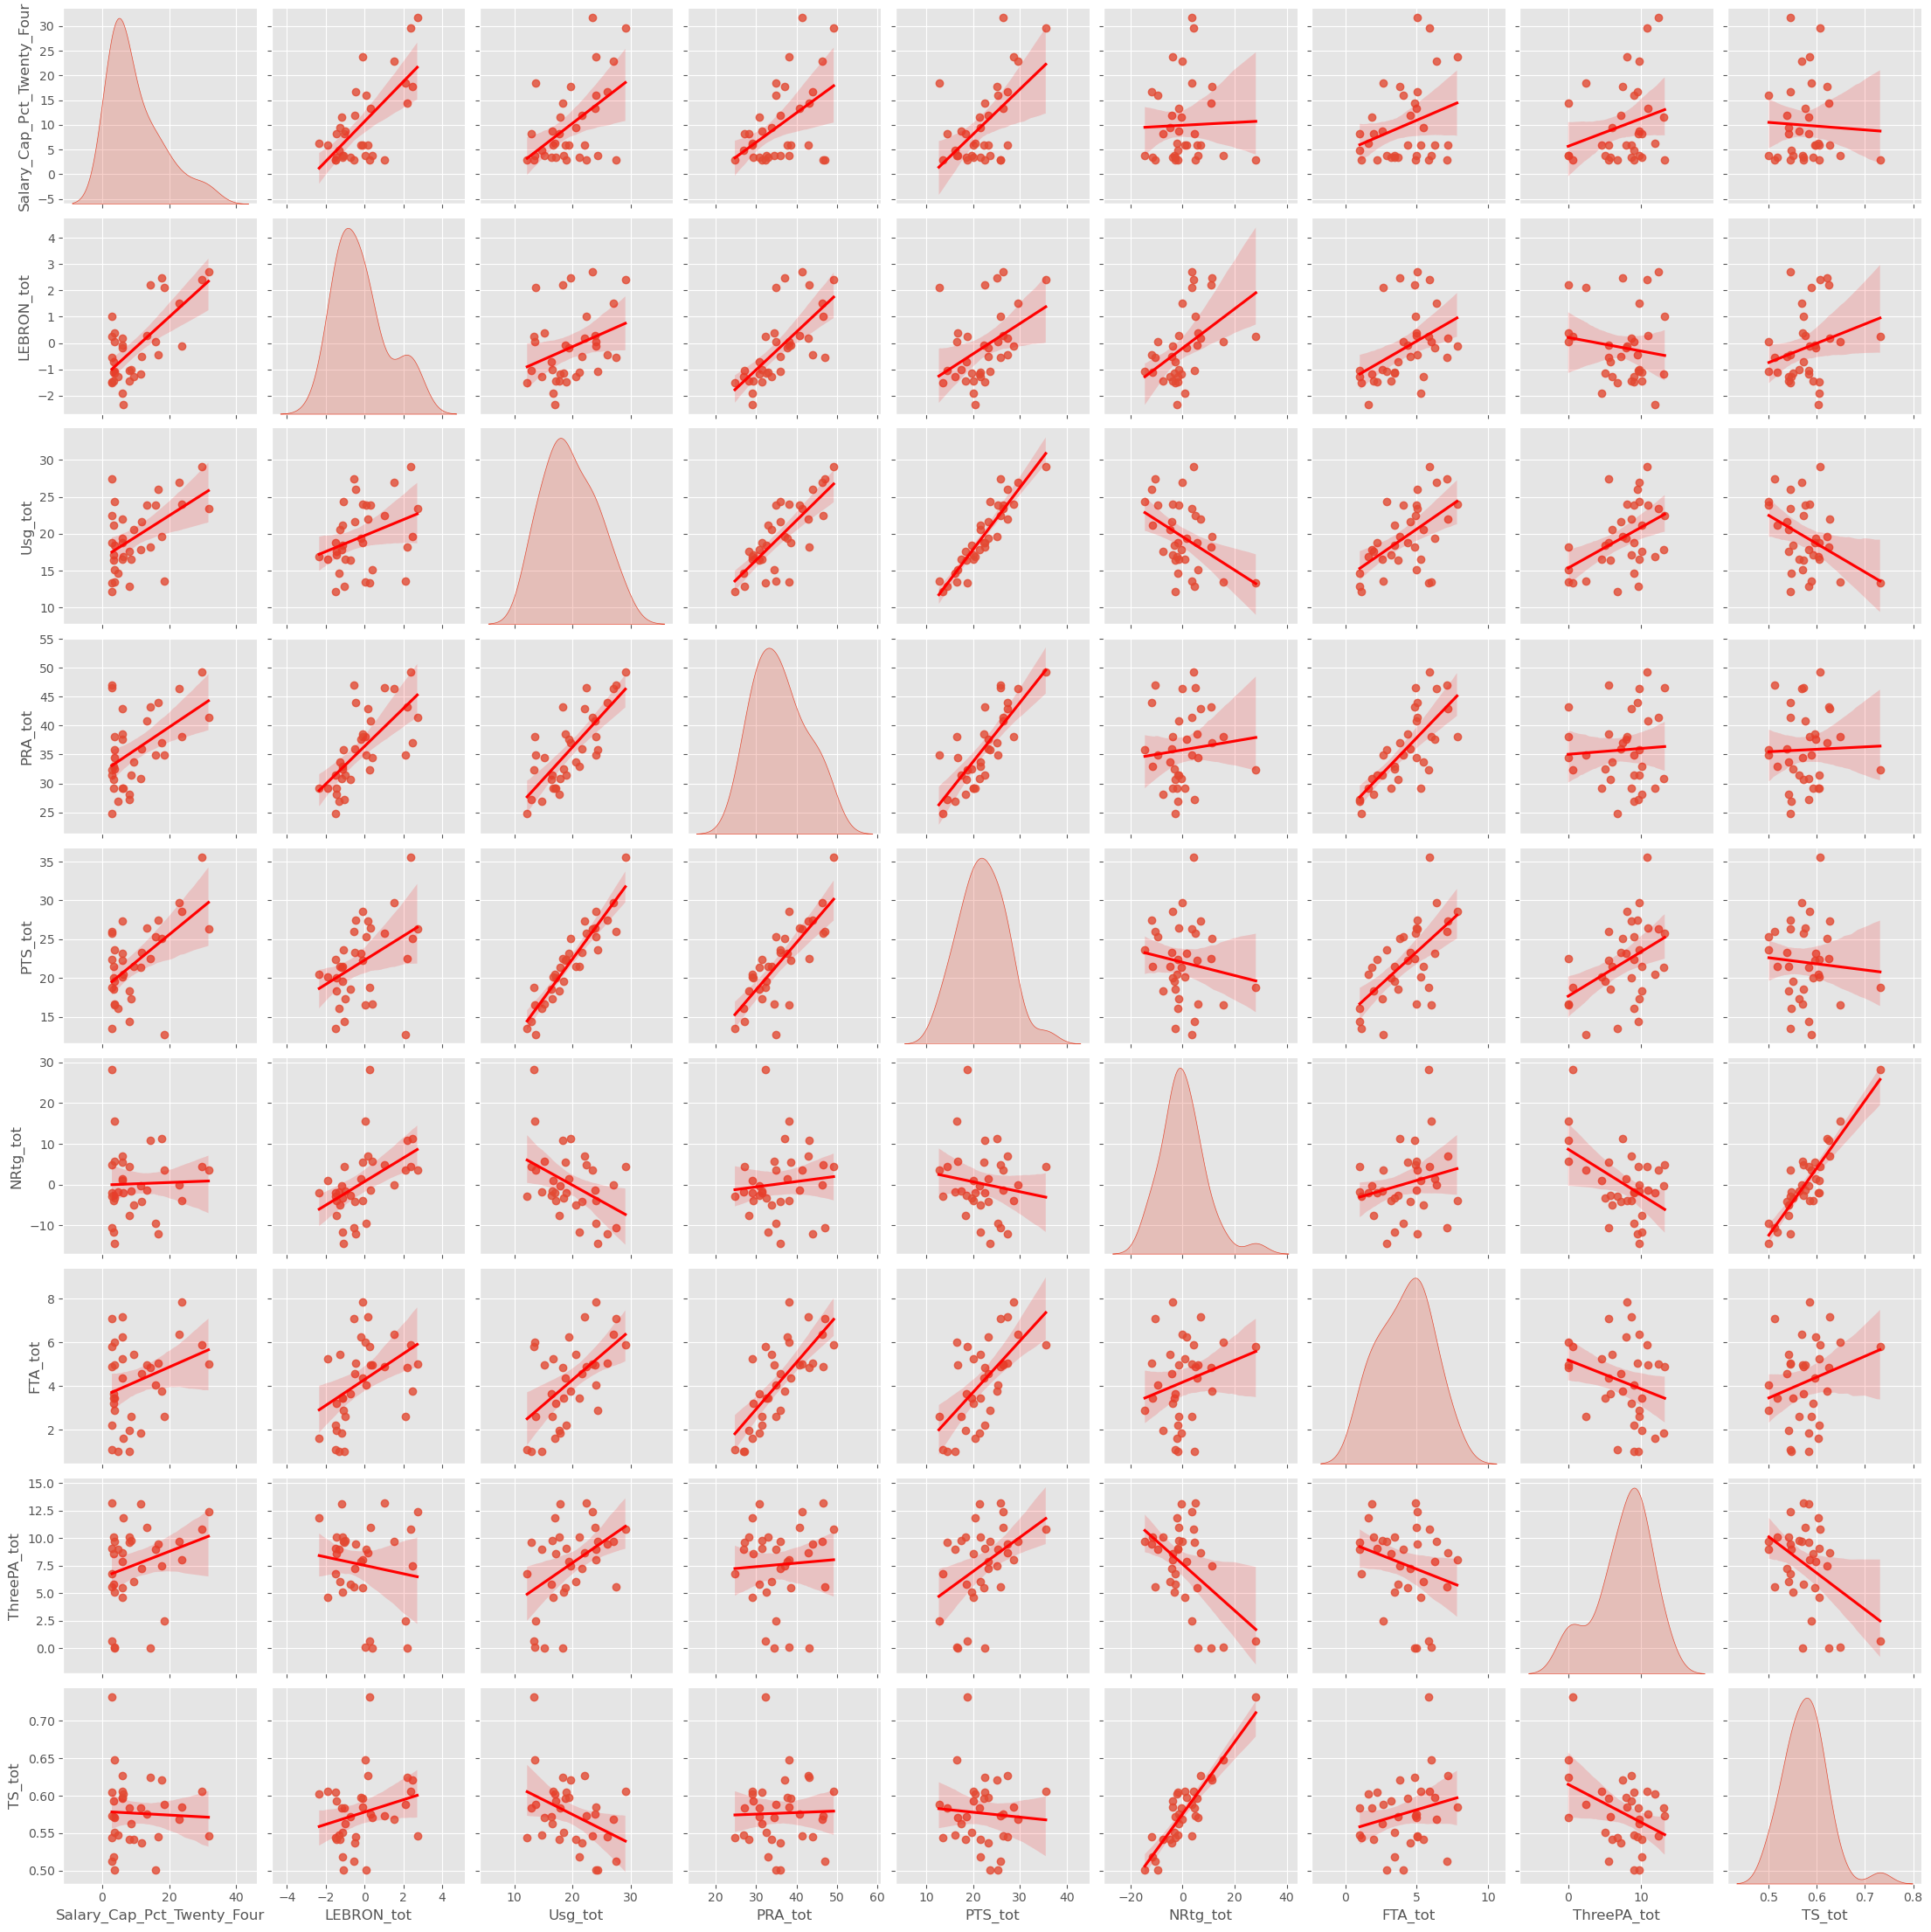

In [43]:
#using qualified players for example to plot total stats

salary_compared_to_tot = qualified_salary_stats[['Salary_Cap_Pct_Twenty_Four','Player','LEBRON_tot', 'Usg_tot', 'PRA_tot', 'PTS_tot', 'NRtg_tot', 'FTA_tot', 'ThreePA_tot', 'TS_tot']]
sns.pairplot(salary_compared_to_tot, diag_kind = "kde", kind = "reg", plot_kws={'line_kws':{'color':'red'}}).savefig('plot with no vet min aav.pdf')

In [ ]:
#Plot matrices for the 2022, 2023 metrics

qualified_salary_stats_22 = qualified_salary_stats[['Salary_Cap_Pct_Twenty_Four','Player','LEBRON_Twenty_Two_LEBRON', 'USGpct_Twenty_Two_adv', 'PRA_Twenty_Two_per_hundred', 'PTS_Twenty_Two_per_hundred', 'NRtg_Twenty_Two_per_hundred', 'FTA_Twenty_Two_per_hundred', 'threePA_Twenty_Two_per_hundred', 'TSpct_Twenty_Two_adv']]
sns.pairplot(qualified_salary_stats_22, diag_kind = "kde", kind = "reg", plot_kws={'line_kws':{'color':'red'}}).savefig('22statssalary.pdf')

qualified_salary_stats_23 = qualified_salary_stats[['Salary_Cap_Pct_Twenty_Four','Player','LEBRON_Twenty_Three_LEBRON', 'USGpct_Twenty_Three_adv', 'PRA_Twenty_Three_per_hundred', 'PTS_Twenty_Three_per_hundred', 'NRtg_Twenty_Three_per_hundred', 'FTA_Twenty_Three_per_hundred', 'threePA_Twenty_Three_per_hundred', 'TSpct_Twenty_Three_adv']]
sns.pairplot(qualified_salary_stats_23, diag_kind = "kde", kind = "reg", plot_kws={'line_kws':{'color':'red'}}).savefig('23statssalary.pdf')

C:\Users\jakob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [ ]:
qualified_salary_stats.to_csv('qualified_salary_stats.csv')
qualified_salary_stats_22.to_csv('qualified_salary_stats22.csv')
qualified_salary_stats_23.to_csv('qualified_salary_stats23.csv')

In [ ]:
#Plot our stacked bar charts

plt.style.use('ggplot')
qualified_salary_stats.loc[qualified_salary_stats['Player'] == 'Nickeil Alexander-Walker', 'Player'] = 'N. Alexander-Walker'
qualified_salary_stats_22.loc[qualified_salary_stats_22['Player'] == 'Nickeil Alexander-Walker', 'Player'] = 'N. Alexander-Walker'
qualified_salary_stats_23.loc[qualified_salary_stats_23['Player'] == 'Nickeil Alexander-Walker', 'Player'] = 'N. Alexander-Walker'

qualified_salary_stats = qualified_salary_stats.rename(columns={'LEBRON_tot': 'LEBRON', 'Usg_tot': 'USG', 'PRA_tot':'PRA', 'PTS_tot':'PTS', 'NRtg_tot': 'NRtg', 'FTA_tot': 'FTA', 'ThreePA_tot': '3PA', 'TS_tot': 'TS'})
qualified_salary_stats_22 = qualified_salary_stats_22.rename(columns={'LEBRON_Twenty_Two_LEBRON': 'LEBRON_22', 'USGpct_Twenty_Two_adv':'USG_22', 'PRA_Twenty_Two_per_hundred': 'PRA_22', 'PTS_Twenty_Two_per_hundred':'PTS_22', 'NRtg_Twenty_Two_per_hundred':'NRtg_22', 'FTA_Twenty_Two_per_hundred':'FTA_22', 'threePA_Twenty_Two_per_hundred':'3PA_22', 'TSpct_Twenty_Two_adv':'TS_22'})
qualified_salary_stats_23 = qualified_salary_stats_23.rename(columns={'LEBRON_Twenty_Three_LEBRON': 'LEBRON_23', 'USGpct_Twenty_Three_adv':'USG_23', 'PRA_Twenty_Three_per_hundred': 'PRA_23', 'PTS_Twenty_Three_per_hundred':'PTS_23', 'NRtg_Twenty_Three_per_hundred':'NRtg_23', 'FTA_Twenty_Three_per_hundred':'FTA_23', 'threePA_Twenty_Three_per_hundred':'3PA_23', 'TSpct_Twenty_Three_adv':'TS_23'})
qualified_salary_stats.index = [qualified_salary_stats.Player,qualified_salary_stats.Salary_Cap_Pct_Twenty_Four]

ax1 = qualified_salary_stats[['LEBRON','PRA','PTS','USG']].sort_values(by='Salary_Cap_Pct_Twenty_Four',ascending=False).plot.bar(stacked =True)
ax1.set_title("2023 NBA Free Agents: '21-'22 & '22-'23 Seasons")
ax1.set_xlabel("Player and Cap % of AAV for 2024 Offseason Contracts")
ax1.set_ylabel("Count")
ax1.legend(loc='best',fontsize='8')
plt.tight_layout()
plt.savefig('2023_NBA_Free_Agents_22_23_stats.pdf')


qualified_salary_stats_22.index = [qualified_salary_stats.Player,qualified_salary_stats.Salary_Cap_Pct_Twenty_Four]
ax2 = qualified_salary_stats_22[['LEBRON_22', 'PRA_22', 'PTS_22', 'USG_22']].plot.bar(stacked = True)
ax2.set_title("2023 NBA Free Agents: '21-'22 Season")
ax2.set_xlabel("Player and Cap % of AAV for 2024 Offseason Contracts")
ax2.set_ylabel("Count")
ax2.legend(loc='best',fontsize='8')
plt.tight_layout()
plt.savefig('2023_NBA_Free_Agents_22_stats.pdf')


qualified_salary_stats_23.index = [qualified_salary_stats.Player,qualified_salary_stats.Salary_Cap_Pct_Twenty_Four]
ax3 = qualified_salary_stats_23[['LEBRON_23', 'PRA_23', 'PTS_23', 'USG_23']].plot.bar(stacked=True)
ax3.set_title("2023 NBA Free Agents: '22-'23 Season")
ax3.set_xlabel("Player and Cap % of AAV for 2024 Offseason Contracts")
ax3.set_ylabel("Count")
ax3.legend(loc='best',fontsize='8')
plt.tight_layout()
plt.savefig('2023_NBA_Free_Agents_23_stats.pdf')

In [ ]:
# Find r-squared values, see which metrics affect salary the most

model = LinearRegression()
def linreg(stat):
    x = np.array([stat]).reshape((-1,1))
    new_model = model.fit(x, qualified_salary_stats.Salary_Cap_Pct_Twenty_Four)
    r_sq = model.score(x, qualified_salary_stats.Salary_Cap_Pct_Twenty_Four)
    coef = new_model.coef_
    return (r_sq, coef)

stats_list = [qualified_salary_stats.LEBRON, qualified_salary_stats.USG,\
              qualified_salary_stats.PTS, qualified_salary_stats.PRA, qualified_salary_stats_22.LEBRON_22,\
             qualified_salary_stats_22.USG_22, qualified_salary_stats_22.PTS_22, qualified_salary_stats_22.PRA_22,\
             qualified_salary_stats_23.LEBRON_23, qualified_salary_stats_23.USG_23, qualified_salary_stats_23.PTS_23,\
             qualified_salary_stats_23.PRA_23]
for i in stats_list:
    r_sq, coef = linreg(i)
    print(f"{i.name} R Squared: {r_sq}, Coefficient: {coef[0]}")